In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
% matplotlib inline

In [51]:
df= pd.read_csv('adult.data',names=['age','wclass','fnwlgt','edu','edunum','marital','occ','relation','race','sex','cap gain','cap loss','country','hourperweek','Income'])

In [52]:
df.head()

,age,wclass,fnwlgt,edu,edunum,marital,occ,relation,race,sex,cap gain,cap loss,country,hourperweek,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
df.shape

(32561, 15)

In [58]:
(df['Income'][0])

1

In [57]:
df['Income']=df['Income'].apply(lambda x: 1 if x==' <=50K' else 0)

In [62]:
df.to_csv('adultnew',sep=' ')

In [15]:
df= pd.read_csv('adultnew',sep=' ')

In [75]:
df['Cap net']=df['cap gain']-df['cap loss']

In [18]:
df= df.drop('Unnamed: 0',axis=1)

In [96]:
df.head()

,age,wclass,fnwlgt,edu,edunum,marital,occ,relation,race,sex,cap gain,cap loss,country,hourperweek,Income,Cap net
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1,0


In [120]:
work=pd.get_dummies(df['wclass'],drop_first=True)
edu=pd.get_dummies(df['edu'],drop_first=True)
mari=pd.get_dummies(df['marital'],drop_first=True)
occ=pd.get_dummies(df['occ'],drop_first=True)
rel= pd.get_dummies(df['relation'],drop_first=True)
race= pd.get_dummies(df['race'],drop_first=True)
country= pd.get_dummies(df['hourperweek'],drop_first=True)

In [121]:
X=pd.concat([df,work,edu,mari,occ,rel,race,country],axis=1)

In [122]:
X=X.drop(['wclass','edu','marital','occ','relation','race','hourperweek'],axis=1)

In [123]:
X['sex']= X['sex'].apply(lambda x: 1 if x==' Male' else 0)

In [124]:
X.head()

,age,fnwlgt,edunum,sex,cap gain,cap loss,country,Income,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,1,2174,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
from sklearn.decomposition import PCA

In [120]:
pc= PCA(n_components= 16)

In [121]:
pc.fit(X.drop('Income',axis=1),X['Income'])

PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [106]:
lm=LogisticRegression()

In [107]:
lm.fit(X.drop('Income',axis=1),X['Income'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
pred=lm.predict(X.drop('Income',axis=1))

In [129]:
(pred==X['Income']).value_counts()

True     25911
False     6650
Name: Income, dtype: int64

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

In [110]:
rc= RandomForestClassifier()

In [111]:
rc.fit(X.drop('Income',axis=1),X['Income'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
pred= rc.predict(X.drop('Income',axis=1))
X.drop('Income',axis=1)

,age,fnwlgt,edunum,sex,cap gain,cap loss,country,Federal-gov,Local-gov,Never-worked,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,1,0,0,45,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,31,45781,14,0,14084,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,42,159449,13,1,5178,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
print(confusion_matrix(pred,X['Income']))

[[ 7841     1]
 [    0 24719]]


In [113]:
test_df= pd.read_csv('adult.test',skiprows= 1,names= ['age','wclass','fnwlgt','edu','edunum','marital','occ','relation','race','sex','cap gain','cap loss','country','hourperweek','Income'])

In [115]:
test_df.shape

(16281, 15)

In [137]:
X_test=X_test.drop(['wclass','edu','marital','occ','relation','race','hourperweek'],axis=1)

In [138]:
X_test['sex']= X_test['sex'].apply(lambda x: 1 if x==' Male' else 0)

In [50]:
X_test.columns!=

,age,fnwlgt,edunum,sex,cap gain,cap loss,country,Income,Federal-gov,Local-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,25,226802.0,7.0,1,0.0,0.0,40.0,<=50K.,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814.0,9.0,1,0.0,0.0,50.0,<=50K.,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951.0,12.0,1,0.0,0.0,40.0,>50K.,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323.0,10.0,1,7688.0,0.0,40.0,>50K.,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497.0,10.0,0,0.0,0.0,30.0,<=50K.,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
X_test['Income']=test_df['Income'].apply(lambda x: 1 if x==' <=50K.' else 0)

In [140]:
X_test.head()

,age,fnwlgt,edunum,sex,cap gain,cap loss,country,Income,Federal-gov,Local-gov,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Holand-Netherlands
0,25,226802,7,1,0,0,40,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,1,0,0,50,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,1,0,0,40,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,44,160323,10,1,7688,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,18,103497,10,0,0,0,30,1,0,0,...,0,0,0,0,0,0,1,0,0,0


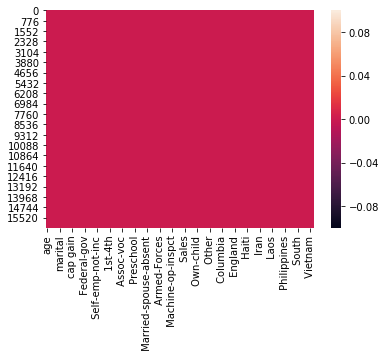

In [81]:
sns.heatmap(X_test.isnull())

In [116]:
work=pd.get_dummies(test_df['wclass'],drop_first=True)
edu=pd.get_dummies(test_df['edu'],drop_first=True)
mari=pd.get_dummies(test_df['marital'],drop_first=True)
occ=pd.get_dummies(test_df['occ'],drop_first=True)
rel= pd.get_dummies(test_df['relation'],drop_first=True)
race= pd.get_dummies(test_df['race'],drop_first=True)
country= pd.get_dummies(test_df['hourperweek'],drop_first=True)

In [118]:
X_test=pd.concat([test_df,work,edu,mari,occ,rel,race,country],axis=1)
X_test.shape

(16281, 107)

In [119]:
X_test.head()

,age,wclass,fnwlgt,edu,edunum,marital,occ,relation,race,sex,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,0,0,0,0,0,0,1,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,0,0,0,0,0,0,1,0,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,0,0,0,0,0,0,1,0,0


In [126]:
for col in X.columns:
    if col not in X_test.columns:
        print(col)

 Holand-Netherlands


In [134]:
X_test['Holand-Netherlands']=0

In [136]:
X_test.drop()

,age,wclass,fnwlgt,edu,edunum,marital,occ,relation,race,sex,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,Holand-Netherlands
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,...,0,0,0,0,0,0,1,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,...,0,0,0,0,0,0,1,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,...,0,0,0,0,0,0,1,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,...,0,0,0,0,0,0,1,0,0,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,...,0,0,0,0,0,0,1,0,0,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,...,0,0,0,0,0,0,1,0,0,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,...,0,0,0,0,0,0,1,0,0,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,...,0,0,0,0,0,0,1,0,0,0
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,...,0,0,0,0,0,0,1,0,0,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,...,0,0,0,0,0,0,1,0,0,0


In [142]:
pred= rc.predict(X_test.drop('Income',axis=1))

In [145]:
print(confusion_matrix(pred,X_test['Income']))

[[ 2218   685]
 [ 1628 11750]]
